In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv("../database/data_final_upd.csv")
df = pd.read_pickle("../database/new_data.pkl")

In [3]:
target_distribution = df['target'].value_counts(normalize=True) * 100

In [4]:
target_distribution

0    96.142815
1     3.857185
Name: target, dtype: float64

In [5]:
# Desired ratio
ratio_1 = 0.4
desired_n_1 = int(len(df) * ratio_1)
desired_n_0 = len(df) - desired_n_1

In [6]:
desired_n_0, desired_n_1

(10251, 6834)

In [7]:
#Downsample the majority class (target = 0)
df_majority = df[df['target'] == 0].sample(n=desired_n_0, random_state=42)

In [8]:
#Upsample the minority class (target = 1) if necessary
df_minority = df[df['target'] == 1]

In [9]:
#combine to get 60/40
df = pd.concat([df_majority, df_minority.sample(n=desired_n_1, replace=True, random_state=42)])

In [10]:
#shuffle
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
target_distribution = df['target'].value_counts(normalize=True) * 100
target_distribution

0    60.0
1    40.0
Name: target, dtype: float64

In [12]:
df.columns

Index(['loan_start_date', 'loan_end_date', 'loan_amount', 'interest_rate',
       'branch', 'collateral_type', 'collateral_amount',
       'credit_history_count', 'overdue_days', 'product', 'age', 'gender',
       'education', 'occupation', 'marital_status', 'target'],
      dtype='object')

In [13]:
df.head()

,loan_start_date,loan_end_date,loan_amount,interest_rate,branch,collateral_type,collateral_amount,credit_history_count,overdue_days,product,age,gender,education,occupation,marital_status,target
0,2019-03-18,2020-03-16,2000000,60.0,super branch,поручительство,4000000.0,2,40.0,006 - ишонч,27,ж,среднее,дехкон,разведен,0
1,2019-11-25,2022-02-19,19000000,60.0,super branch,золото,31700000.0,4,135.0,008 - сармоя (узок муддатли),31,ж,высшее,шофер-таксист,женат,1
2,2019-03-12,2021-10-12,17000000,57.6,super branch,машина,24300000.0,1,20.0,008 - сармоя (узок муддатли),28,м,среднее,дехкон,не женат,0
3,2022-04-18,2023-04-18,15000000,60.0,yaypan filiali,машина,21500000.0,1,3.0,009 - сармоя (киска муддатли),30,м,высшее,шофер-таксист,разведен,0
4,2020-07-06,2021-07-06,1000000,60.0,super branch,золото,1206500.0,1,116.0,007 - имкон (киска муддатли),58,ж,среднее,тикувчи,женат,1


In [6]:

# df.rename(columns = {'Нач.дата':'loan_start_date'}, inplace = True)
# df.rename(columns = {'Кон.дата':'loan_end_date'}, inplace = True)
# df.rename(columns = {'Сумма':'loan_amount'}, inplace = True)
# df.rename(columns = {'% ставка':'interest_rate'}, inplace = True)
# df.rename(columns = {'Название филиала':'branch'}, inplace = True)
# df.rename(columns = {'Наименование типа залога':'collateral_type'}, inplace = True)
# df.rename(columns = {'Сумма залога':'collateral_amount'}, inplace = True)
# df.rename(columns = {'credit_history_count':'credit_history_count'}, inplace = True)
# df.rename(columns = {'Кол-во просроченных дней':'overdue_days'}, inplace = True)
# df.rename(columns = {'credit_history_count':'credit_history_count'}, inplace = True)
# df.rename(columns = {'target':'target'}, inplace = True)


In [7]:
# df.columns

Index(['№', 'Код', 'Продукт', 'Номер контракта', 'loan_start_date',
       'loan_end_date', 'loan_amount', 'interest_rate',
       'Наименование назначения', 'Дата классификации', 'К оплате',
       'Просроченные', 'Списанные на 91501', 'Срок не наступил', 'Итого',
       'Срок погаш. не наступил', 'На 12505 [Не просрочен]',
       'На 12505 [Просрочен]', 'Реструктуризированный', 'В суде', 'Итого.1',
       'Пеня', 'Автоматический', 'Ручной',
       'Дата последнего перевода на просрочку',
       'Дата последнего погашения основного долга', 'Примечание в клиенте',
       'Примечание в кредите', 'Кредитный сотрудник', 'branch',
       'collateral_type', 'collateral_amount',
       'Остаточная сумма залога на балансе', 'client_id',
       'credit_history_count', 'overdue_days', 'target'],
      dtype='object')

In [9]:
# new_df = df[["loan_start_date", "loan_end_date", "loan_amount", "interest_rate", "branch", "collateral_type", "collateral_amount", "credit_history_count", "overdue_days", "target"]]

In [11]:
# new_df.isna()

,loan_start_date,loan_end_date,loan_amount,interest_rate,branch,collateral_type,collateral_amount,credit_history_count,overdue_days,target
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
17080,False,False,False,False,False,False,False,False,False,False
17081,False,False,False,False,False,False,False,False,False,False
17082,False,False,False,False,False,False,False,False,False,False
17083,False,False,False,False,False,False,False,False,False,False


In [13]:
# def add_random_values(data):
#     professions = ['дехкон', 'тикувчи', 'тадбиркор', 'уста', 'шофер-таксист']
#     data['occupation'] = np.random.choice(professions, size=len(data))

#     marital_status = ['женат', 'не женат', 'разведен']
#     data['marital_status'] = np.random.choice(marital_status, size=len(data))
    
#     data['age'] = np.random.randint(20, 65, size=len(data))

#     genders = ['мужской', 'женский']
#     data['gender'] = np.random.choice(genders, size=len(data))

#     return data

In [14]:
# new_df = add_random_values(new_df)

/tmp/ipykernel_4802/1260085936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['occupation'] = np.random.choice(professions, size=len(data))
/tmp/ipykernel_4802/1260085936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['marital_status'] = np.random.choice(marital_status, size=len(data))
/tmp/ipykernel_4802/1260085936.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [15]:
# new_df

,loan_start_date,loan_end_date,loan_amount,interest_rate,branch,collateral_type,collateral_amount,credit_history_count,overdue_days,target,occupation,marital_status,age,gender
0,2019-03-18,2020-03-16,2000000,60.0,SUPER BRANCH,"Поручительство третьих лиц, Поручительство тр...",4000000.0,2,32.0,0,тикувчи,женат,33,женский
1,2019-11-25,2022-02-19,19000000,60.0,SUPER BRANCH,"Транспортные средства,",31700000.0,4,135.0,1,уста,не женат,55,мужской
2,2019-03-12,2021-10-12,17000000,57.6,SUPER BRANCH,"Транспортные средства,",24300000.0,1,20.0,0,шофер-таксист,не женат,45,женский
3,2022-04-18,2023-04-18,15000000,60.0,YAYPAN FILIALI,"Транспортные средства,",21500000.0,1,32.0,0,шофер-таксист,не женат,46,мужской
4,2020-07-06,2021-07-06,1000000,60.0,SUPER BRANCH,"Ювелирные изделия,",1206500.0,1,116.0,1,дехкон,не женат,63,женский
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17080,2021-10-15,2022-10-14,4000000,60.0,QO‘QON FILIALI,"Ювелирные изделия,",4524000.0,1,78.0,1,уста,не женат,27,женский
17081,2021-05-25,2022-05-16,7500000,60.0,YAYPAN FILIALI,"Поручительство третьих лиц,",7500000.0,1,74.0,1,дехкон,не женат,41,женский
17082,2021-04-07,2023-04-07,10000000,60.0,POP FILIALI,"Поручительство третьих лиц,",10000000.0,2,15.0,0,тикувчи,не женат,39,женский
17083,2021-07-19,2022-07-19,7400000,60.0,SUPER BRANCH,"Ювелирные изделия,",8380800.0,5,44.0,0,тадбиркор,не женат,49,женский


In [14]:
df.isna()

,loan_start_date,loan_end_date,loan_amount,interest_rate,branch,collateral_type,collateral_amount,credit_history_count,overdue_days,product,age,gender,education,occupation,marital_status,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17080,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17081,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17082,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17083,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df['loan_start_date'] = pd.to_datetime(df['loan_start_date'], errors='coerce')
df['loan_end_date'] = pd.to_datetime(df['loan_end_date'], errors='coerce')
df['loan_duration_days'] = (df['loan_end_date'] - df['loan_start_date']).dt.days

#дни -> месяцы
df['loan_duration_month'] = (df['loan_duration_days'] / 30).fillna(0).astype(int)


In [16]:
df

,loan_start_date,loan_end_date,loan_amount,interest_rate,branch,collateral_type,collateral_amount,credit_history_count,overdue_days,product,age,gender,education,occupation,marital_status,target,loan_duration_days,loan_duration_month
0,2019-03-18,2020-03-16,2000000,60.0,super branch,поручительство,4000000.0,2,40.0,006 - ишонч,27,ж,среднее,дехкон,разведен,0,364,12
1,2019-11-25,2022-02-19,19000000,60.0,super branch,золото,31700000.0,4,135.0,008 - сармоя (узок муддатли),31,ж,высшее,шофер-таксист,женат,1,817,27
2,2019-03-12,2021-10-12,17000000,57.6,super branch,машина,24300000.0,1,20.0,008 - сармоя (узок муддатли),28,м,среднее,дехкон,не женат,0,945,31
3,2022-04-18,2023-04-18,15000000,60.0,yaypan filiali,машина,21500000.0,1,3.0,009 - сармоя (киска муддатли),30,м,высшее,шофер-таксист,разведен,0,365,12
4,2020-07-06,2021-07-06,1000000,60.0,super branch,золото,1206500.0,1,116.0,007 - имкон (киска муддатли),58,ж,среднее,тикувчи,женат,1,365,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17080,2021-10-15,2022-10-14,4000000,60.0,qo‘qon filiali,машина,4524000.0,1,78.0,007 - имкон (киска муддатли),20,м,высшее,уста,не женат,1,364,12
17081,2021-05-25,2022-05-16,7500000,60.0,yaypan filiali,поручительство,7500000.0,1,74.0,022 - хамкор сармоя (қисқа муддатли),20,м,среднее,уста,разведен,1,356,11
17082,2021-04-07,2023-04-07,10000000,60.0,pop filiali,поручительство,10000000.0,2,22.0,019 - хамкор сармоя (узоқ муддатли),61,м,среднее,дехкон,женат,0,730,24
17083,2021-07-19,2022-07-19,7400000,60.0,super branch,золото,8380800.0,5,44.0,007 - имкон (киска муддатли),22,ж,высшее,тадбиркор,женат,0,365,12


In [17]:
df.columns

Index(['loan_start_date', 'loan_end_date', 'loan_amount', 'interest_rate',
       'branch', 'collateral_type', 'collateral_amount',
       'credit_history_count', 'overdue_days', 'product', 'age', 'gender',
       'education', 'occupation', 'marital_status', 'target',
       'loan_duration_days', 'loan_duration_month'],
      dtype='object')

In [18]:
numerical_features = ['loan_amount', 'interest_rate', 'collateral_amount', 'age', 'credit_history_count', 'overdue_days']
categorical_features = ['branch', 'collateral_type', 'product', 'education', 'occupation', 'marital_status', 'gender']


In [19]:

df_clean = df[numerical_features + categorical_features + ['target']].dropna()

In [20]:
X = df_clean.drop('target', axis=1)
y = df_clean['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [23]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [24]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['loan_amount',
                                                   'interest_rate',
                                                   'collateral_amount', 'age',
                                                   'credit_history_count',
                                                   'overdue_days']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['branch', 'collateral_type',
                                                   'product', 'education',
                                                   'occupation',
                                                   'marital_status',
                                                   'gender'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [25]:
y_pred = pipeline.predict(X_test)

In [26]:
# AUC score
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Get the probability estimates for the positive class
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score}")

AUC Score: 0.9996374471425767


In [27]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

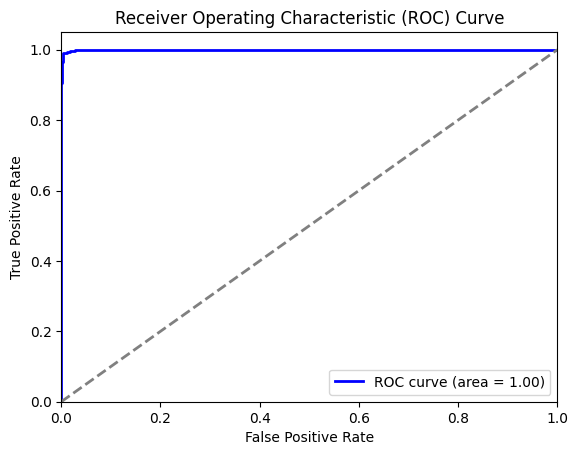

In [28]:

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
classification_report_result = classification_report(y_test, y_pred)

In [30]:
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2050
           1       0.98      0.99      0.99      1367

    accuracy                           0.99      3417
   macro avg       0.99      0.99      0.99      3417
weighted avg       0.99      0.99      0.99      3417



In [31]:
import joblib
joblib.dump(pipeline, "../model/new_logistic_regression_model.pkl")


['../model/new_logistic_regression_model.pkl']

In [32]:
##feature importance


In [33]:
coefficients = pipeline.named_steps['classifier'].coef_[0]

In [34]:
feature_importance_dict = {}

In [35]:
for feature, coef in zip(numerical_features, coefficients[:len(numerical_features)]):
    feature_importance_dict[feature] = coef


In [36]:
for i, cat_feature in enumerate(categorical_features):
    start_index = len(numerical_features) + i * len(pipeline.named_steps['preprocessor'].transformers_[1][1].categories_[i])
    end_index = start_index + len(pipeline.named_steps['preprocessor'].transformers_[1][1].categories_[i])
    
    average_coef = np.mean(coefficients[start_index:end_index])
    feature_importance_dict[cat_feature] = average_coef


In [37]:
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)


In [38]:
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

Feature Importance:
overdue_days: 18.3959
gender: 1.4279
interest_rate: 1.1067
collateral_type: 0.8851
occupation: -0.3316
loan_amount: -0.1355
marital_status: -0.1128
age: -0.0731
collateral_amount: 0.0495
product: 0.0317
credit_history_count: 0.0210
education: -0.0095
branch: 0.0001


In [39]:
##visualization

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

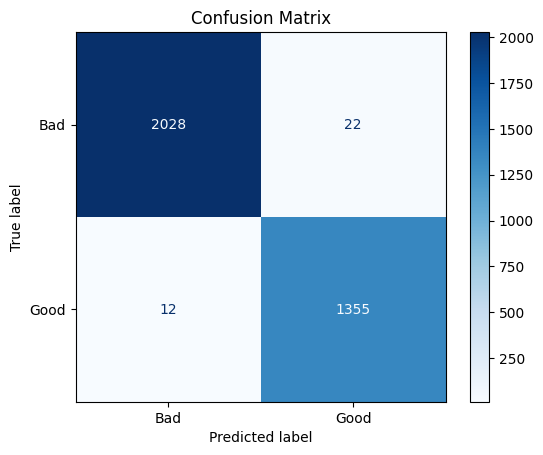

In [41]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Bad', 'Good'])
conf_matrix_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

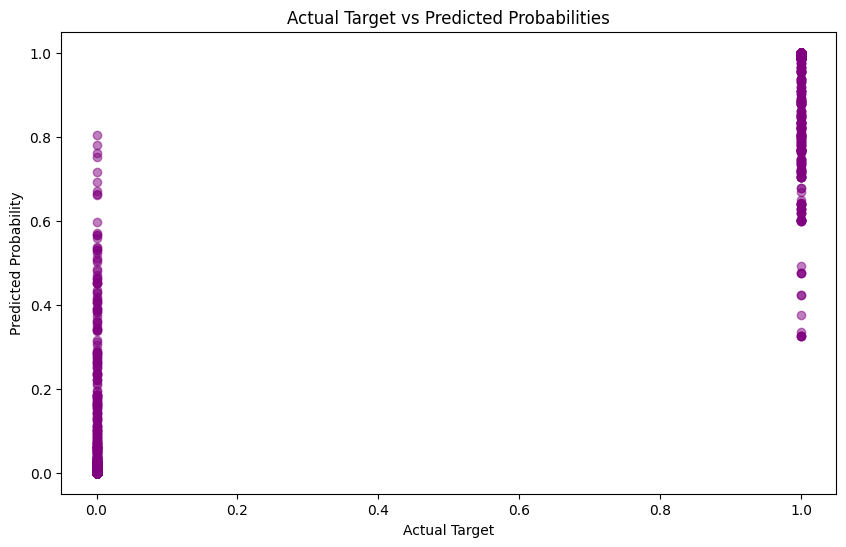

In [42]:
# Scatter Plot: Actual vs Predicted Probabilities
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_prob, alpha=0.5, color='purple')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Probability')
plt.title('Actual Target vs Predicted Probabilities')
plt.show()